### Zaimportowanie niezbędnych bibliotek

In [419]:
import pandas as pd
import matplotlib.pyplot as plt

### Wczytanie danych z pliku csv oraz wyświetlnie 5 pierwszych rzędów

In [420]:
data = pd.read_csv("graduates-major-data.csv",sep = ';')
data.head()

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (288) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,P_ROKDYP,P_KIERUNEK_ID,P_POZIOM,P_FORMA,P_N,P_N_WZUS,P_N_POZAZUS,P_PROC_WZUS,P_PROC_POZAZUS,P_PROC_DOSW,...,P_DZIEDZINA_ID,P_DZIEDZINA,P_N_SEMESTR,P_MUNDUR,P_UCZELNIA_SKROT,P_POZIOM_TEKST_PL,P_POZIOM_TEKST_EN,P_NAZWA_KIERUNKU_PELNA,P_NAZWA_KIERUNKU_PELNA_ENG,P_WOJ
0,2014,1090,2,S,10,10,0,100,0,50,...,8,Dziedzina sztuki,4,0,UHPJDC,Studia drugiego stopnia,Second-cycle programme,Edukacja artystyczna w zakresie sztuki muzyczn...,Edukacja artystyczna w zakresie sztuki muzyczn...,24.0
1,2014,1525,2,N,45,45,0,100,0,"64,4",...,3,Dziedzina nauk medycznych i nauk o zdrowiu,4,0,AWFJKK,Studia drugiego stopnia,Second-cycle programme,"Wychowanie fizyczne, studia niestacjonarne dru...","Wychowanie fizyczne, part-time second-cycle pr...",24.0
2,2014,1536,2,S,156,153,3,"98,1","1,9","17,9",...,3,Dziedzina nauk medycznych i nauk o zdrowiu,4,0,AWFJPW,Studia drugiego stopnia,Second-cycle programme,"Wychowanie fizyczne, studia stacjonarne drugie...","Wychowanie fizyczne, full-time second-cycle pr...",14.0
3,2014,1711,2,S,89,83,6,"93,3","6,7","7,9",...,6,Dziedzina nauk społecznych,4,0,KUL,Studia drugiego stopnia,Second-cycle programme,"Ekonomia, studia stacjonarne drugiego stopnia,...","Ekonomia, full-time second-cycle programme, 4 ...",6.0
4,2014,2019,2,S,20,19,1,95,5,20,...,2,Dziedzina nauk inżynieryjno-technicznych,3,0,PG,Studia drugiego stopnia,Second-cycle programme,"Mechatronika, studia stacjonarne drugiego stop...","Mechatronika, full-time second-cycle programme...",22.0


### Wstępna obróbka danych

In [421]:
data_informatyka = data[data["P_NAZWA_KIERUNKU_PELNA"].str.lower().str.contains('informatyka') == 1]        # wybranie kierunków które mają słowo 'informatyka' w nazwie
data_informatyka = data_informatyka[data_informatyka["P_DZIEDZINA"].str.lower().str.contains('inż') == 0]   # usunięcie dziedziny zawierającą "inż", gdyż interesuje nas tylko licenjat i tytuł magistra
data_informatyka = data_informatyka[data_informatyka["P_E_ZAR_P5"].notna()]                                 # usunięcie rzędów w których nie mamy danych na temat zarobków po pięciu latach od uzyskania dyplomu
data_informatyka["P_E_ZAR_P5"] = pd.to_numeric(data_informatyka["P_E_ZAR_P5"].str.replace(',','.'))         # zamieninie typu na wartość numeryczna oraz zamiana przecinka na kropkę
data_informatyka

,P_ROKDYP,P_KIERUNEK_ID,P_POZIOM,P_FORMA,P_N,P_N_WZUS,P_N_POZAZUS,P_PROC_WZUS,P_PROC_POZAZUS,P_PROC_DOSW,...,P_DZIEDZINA_ID,P_DZIEDZINA,P_N_SEMESTR,P_MUNDUR,P_UCZELNIA_SKROT,P_POZIOM_TEKST_PL,P_POZIOM_TEKST_EN,P_NAZWA_KIERUNKU_PELNA,P_NAZWA_KIERUNKU_PELNA_ENG,P_WOJ
243,2015,6581,1,S,30,30,0,100,0,"6,7",...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,UWB,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",20.0
333,2015,111406,1,N,21,21,0,100,0,81,...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,WWSSESW,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia niestacjonarne pierwszego ...","Informatyka, part-time first-cycle programme, ...",30.0
339,2015,112332,1,S,18,18,0,100,0,"27,8",...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,UKSW,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",14.0
1215,2014,109089,1,S,57,57,0,100,0,7,...,6,Dziedzina nauk społecznych,6,0,UEW,Studia pierwszego stopnia,First-cycle programme,"Informatyka w biznesie - k. unikatowy, studia ...","Informatyka w biznesie - k. unikatowy, full-ti...",2.0
1261,2014,111431,1,N,15,15,0,100,0,"66,7",...,6,Dziedzina nauk społecznych,6,0,WSIETO,Studia pierwszego stopnia,First-cycle programme,"Informatyka i ekonometria, studia niestacjonar...","Informatyka i ekonometria, part-time first-cyc...",28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40848,2015,4348,2,S,11,11,0,100,0,"72,7",...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UMK,Studia drugiego stopnia,Second-cycle programme,"Informatyka, studia stacjonarne drugiego stopn...","Informatyka, full-time second-cycle programme,...",4.0
40887,2015,7851,2,S,60,59,1,"98,3","1,7","51,7",...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UJK,Studia drugiego stopnia,Second-cycle programme,"Informatyka, studia stacjonarne drugiego stopn...","Informatyka, full-time second-cycle programme,...",12.0
40939,2015,109458,1,N,16,16,0,100,0,"93,8",...,5,Dziedzina nauk ścisłych i przyrodniczych,7,0,PWSZC1,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia niestacjonarne pierwszego ...","Informatyka, part-time first-cycle programme, ...",14.0
40940,2015,109458,1,S,21,21,0,100,0,"4,8",...,5,Dziedzina nauk ścisłych i przyrodniczych,7,0,PWSZC1,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",14.0


### Podzielnie danych na dwie części - dane dla absolwentów I stopnia oraz II stopnia

In [422]:
data_informatyka_pierwszy_stopien = data_informatyka[data_informatyka['P_POZIOM'] == "1"]
data_informatyka_pierwszy_stopien

,P_ROKDYP,P_KIERUNEK_ID,P_POZIOM,P_FORMA,P_N,P_N_WZUS,P_N_POZAZUS,P_PROC_WZUS,P_PROC_POZAZUS,P_PROC_DOSW,...,P_DZIEDZINA_ID,P_DZIEDZINA,P_N_SEMESTR,P_MUNDUR,P_UCZELNIA_SKROT,P_POZIOM_TEKST_PL,P_POZIOM_TEKST_EN,P_NAZWA_KIERUNKU_PELNA,P_NAZWA_KIERUNKU_PELNA_ENG,P_WOJ
243,2015,6581,1,S,30,30,0,100,0,"6,7",...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,UWB,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",20.0
333,2015,111406,1,N,21,21,0,100,0,81,...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,WWSSESW,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia niestacjonarne pierwszego ...","Informatyka, part-time first-cycle programme, ...",30.0
339,2015,112332,1,S,18,18,0,100,0,"27,8",...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,UKSW,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",14.0
1215,2014,109089,1,S,57,57,0,100,0,7,...,6,Dziedzina nauk społecznych,6,0,UEW,Studia pierwszego stopnia,First-cycle programme,"Informatyka w biznesie - k. unikatowy, studia ...","Informatyka w biznesie - k. unikatowy, full-ti...",2.0
1261,2014,111431,1,N,15,15,0,100,0,"66,7",...,6,Dziedzina nauk społecznych,6,0,WSIETO,Studia pierwszego stopnia,First-cycle programme,"Informatyka i ekonometria, studia niestacjonar...","Informatyka i ekonometria, part-time first-cyc...",28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39754,2015,7959,1,S,28,28,0,100,0,"14,3",...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,UJK,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",12.0
40681,2014,106114,1,S,20,19,1,95,5,5,...,5,Dziedzina nauk ścisłych i przyrodniczych,6,0,UWB,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",20.0
40939,2015,109458,1,N,16,16,0,100,0,"93,8",...,5,Dziedzina nauk ścisłych i przyrodniczych,7,0,PWSZC1,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia niestacjonarne pierwszego ...","Informatyka, part-time first-cycle programme, ...",14.0
40940,2015,109458,1,S,21,21,0,100,0,"4,8",...,5,Dziedzina nauk ścisłych i przyrodniczych,7,0,PWSZC1,Studia pierwszego stopnia,First-cycle programme,"Informatyka, studia stacjonarne pierwszego sto...","Informatyka, full-time first-cycle programme, ...",14.0


In [423]:
data_informatyka_drugi_stopien = data_informatyka[data_informatyka['P_POZIOM'] == "2"]
data_informatyka_drugi_stopien

,P_ROKDYP,P_KIERUNEK_ID,P_POZIOM,P_FORMA,P_N,P_N_WZUS,P_N_POZAZUS,P_PROC_WZUS,P_PROC_POZAZUS,P_PROC_DOSW,...,P_DZIEDZINA_ID,P_DZIEDZINA,P_N_SEMESTR,P_MUNDUR,P_UCZELNIA_SKROT,P_POZIOM_TEKST_PL,P_POZIOM_TEKST_EN,P_NAZWA_KIERUNKU_PELNA,P_NAZWA_KIERUNKU_PELNA_ENG,P_WOJ
1387,2015,13152,2,S,73,73,0,100,0,"27,4",...,6,Dziedzina nauk społecznych,4,0,UG,Studia drugiego stopnia,Second-cycle programme,"Informatyka i ekonometria, studia stacjonarne ...","Informatyka i ekonometria, full-time second-cy...",22.0
2253,2014,106029,2,S,13,13,0,100,0,"84,6",...,6,Dziedzina nauk społecznych,4,0,UW,Studia drugiego stopnia,Second-cycle programme,"Informatyka i ekonometria, studia stacjonarne ...","Informatyka i ekonometria, full-time second-cy...",14.0
2578,2015,127497,2,S,46,45,1,"97,8","2,2","45,7",...,6,Dziedzina nauk społecznych,4,0,UEW,Studia drugiego stopnia,Second-cycle programme,"Informatyka i ekonometria, studia stacjonarne ...","Informatyka i ekonometria, full-time second-cy...",2.0
3381,2014,7365,2,S,16,15,1,"93,8","6,2","56,2",...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UL,Studia drugiego stopnia,Second-cycle programme,"Informatyka i ekonometria, studia stacjonarne ...","Informatyka i ekonometria, full-time second-cy...",10.0
3388,2014,8244,2,S,30,29,1,"96,7","3,3","16,7",...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UMCS,Studia drugiego stopnia,Second-cycle programme,"Informatyka, studia stacjonarne drugiego stopn...","Informatyka, full-time second-cycle programme,...",6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40654,2014,4454,2,S,14,14,0,100,0,"42,9",...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UO,Studia drugiego stopnia,Second-cycle programme,"Informatyka, studia stacjonarne drugiego stopn...","Informatyka, full-time second-cycle programme,...",16.0
40659,2014,6749,2,S,46,37,9,"80,4","19,6",13,...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UW,Studia drugiego stopnia,Second-cycle programme,"Informatyka, studia stacjonarne drugiego stopn...","Informatyka, full-time second-cycle programme,...",14.0
40838,2015,3793,2,N,20,19,1,95,5,85,...,6,Dziedzina nauk społecznych,4,0,UEW,Studia drugiego stopnia,Second-cycle programme,"Informatyka w biznesie - k. unikatowy, studia ...","Informatyka w biznesie - k. unikatowy, part-ti...",2.0
40848,2015,4348,2,S,11,11,0,100,0,"72,7",...,5,Dziedzina nauk ścisłych i przyrodniczych,4,0,UMK,Studia drugiego stopnia,Second-cycle programme,"Informatyka, studia stacjonarne drugiego stopn...","Informatyka, full-time second-cycle programme,...",4.0


### Wyodrębnienie kierunków na których co najmniej 25 osób zdobyło licencjat

In [424]:
lista_kierunkow_1 = data_informatyka_pierwszy_stopien["P_KIERUNEK_NAZWA"].unique().tolist()
print(len(lista_kierunkow_1))
kierunek_liczba_studentow_1 = data_informatyka_pierwszy_stopien.groupby(by = ["P_KIERUNEK_NAZWA"])["P_N"].sum()
print(kierunek_liczba_studentow_1)

kierunek_1_25 = []
liczba_absolwentow_1_25 = []
for i in range(len(kierunek_liczba_studentow_1.values)):
    if kierunek_liczba_studentow_1.values[i] >= 25:
        kierunek_1_25.append(kierunek_liczba_studentow_1.index[i])
        liczba_absolwentow_1_25.append(kierunek_liczba_studentow_1.values[i])
print(len(kierunek_1_25))
print(kierunek_1_25)

11
P_KIERUNEK_NAZWA
Bioinformatyka                             36
Bioinformatyka - k. unikatowy              54
Bioinformatyka i biologia systemów         36
Informatyka                              1845
Informatyka analityczna                    25
Informatyka i agroinżynieria               64
Informatyka i ekonometria                1109
Informatyka stosowana                     126
Informatyka stosowana - k. unikatowy      266
Informatyka w biznesie - k. unikatowy     132
Makrokierunek - bioinformatyka             13
Name: P_N, dtype: int64
10
['Bioinformatyka', 'Bioinformatyka - k. unikatowy', 'Bioinformatyka i biologia systemów', 'Informatyka', 'Informatyka analityczna', 'Informatyka i agroinżynieria', 'Informatyka i ekonometria', 'Informatyka stosowana', 'Informatyka stosowana - k. unikatowy', 'Informatyka w biznesie - k. unikatowy']


### Stworzenie dwóch funkcji do wypełniania zawartości kolumn

In [425]:
def suma_zarobkow(row):         # mnoży liczbę absolwentów przez średnie zarobki
    return row["P_N"] * row["P_E_ZAR_P5"]

def srednie_zarobki(row):       # dzieli sumę zarobków przez całkowitą liczbę studentów
    return row["Suma zarobków"] / row["Liczba absolwentów"]

### Pogrupowanie absolwentów po kierunkach, stworzneie nowych kolumn

In [426]:
data_informatyka_pierwszy_stopien = data_informatyka_pierwszy_stopien[data_informatyka_pierwszy_stopien["P_KIERUNEK_NAZWA"].isin(kierunek_1_25)]
data_informatyka_pierwszy_stopien["Suma zarobków"] = data_informatyka_pierwszy_stopien.apply(lambda row: suma_zarobkow(row), axis=1)
data_informatyka_pierwszy_stopien = data_informatyka_pierwszy_stopien.groupby(by = "P_KIERUNEK_NAZWA")["Suma zarobków"].sum().to_frame()
data_informatyka_pierwszy_stopien["Liczba absolwentów"] = liczba_absolwentow_1_25
data_informatyka_pierwszy_stopien["Średnie miesięczne wynagrodzenie"] = data_informatyka_pierwszy_stopien.apply(lambda row: srednie_zarobki(row), axis=1)
data_informatyka_pierwszy_stopien["Kierunek"] = kierunek_1_25
data_informatyka_pierwszy_stopien

<ipython-input-426-670a2ceb036f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_informatyka_pierwszy_stopien["Suma zarobków"] = data_informatyka_pierwszy_stopien.apply(lambda row: suma_zarobkow(row), axis=1)


,Suma zarobków,Liczba absolwentów,Średnie miesięczne wynagrodzenie,Kierunek
P_KIERUNEK_NAZWA,,,,
Bioinformatyka,208487.88,36,5791.330000,Bioinformatyka
Bioinformatyka - k. unikatowy,258769.57,54,4792.029074,Bioinformatyka - k. unikatowy
Bioinformatyka i biologia systemów,275747.85,36,7659.662500,Bioinformatyka i biologia systemów
Informatyka,13996240.73,1845,7586.038336,Informatyka
Informatyka analityczna,263590.75,25,10543.630000,Informatyka analityczna
Informatyka i agroinżynieria,336987.24,64,5265.425625,Informatyka i agroinżynieria
Informatyka i ekonometria,7027501.97,1109,6336.791677,Informatyka i ekonometria
Informatyka stosowana,1243827.46,126,9871.646508,Informatyka stosowana
Informatyka stosowana - k. unikatowy,1979577.97,266,7442.022444,Informatyka stosowana - k. unikatowy


### Stworzenie bardziej przejrzystej tabeli

In [427]:
informatyka_pierwszy_stopien = data_informatyka_pierwszy_stopien[["Kierunek", "Średnie miesięczne wynagrodzenie","Liczba absolwentów"]].to_numpy()
informatyka_pierwszy_stopien = pd.DataFrame(informatyka_pierwszy_stopien, columns=["Kierunek", "Średnie miesięczne wynagrodzenie","Liczba absolwentów"])
informatyka_pierwszy_stopien = informatyka_pierwszy_stopien.sort_values(by ="Średnie miesięczne wynagrodzenie", ascending=False)
informatyka_pierwszy_stopien.reset_index(inplace=True, drop = True)
informatyka_pierwszy_stopien

,Kierunek,Średnie miesięczne wynagrodzenie,Liczba absolwentów
0,Informatyka analityczna,10543.63,25
1,Informatyka stosowana,9871.646508,126
2,Bioinformatyka i biologia systemów,7659.6625,36
3,Informatyka,7586.038336,1845
4,Informatyka stosowana - k. unikatowy,7442.022444,266
5,Informatyka w biznesie - k. unikatowy,6820.42697,132
6,Informatyka i ekonometria,6336.791677,1109
7,Bioinformatyka,5791.33,36
8,Informatyka i agroinżynieria,5265.425625,64
9,Bioinformatyka - k. unikatowy,4792.029074,54


### Stworzenie wykresu typu barh w celu wizualizacji wynagrodzenia

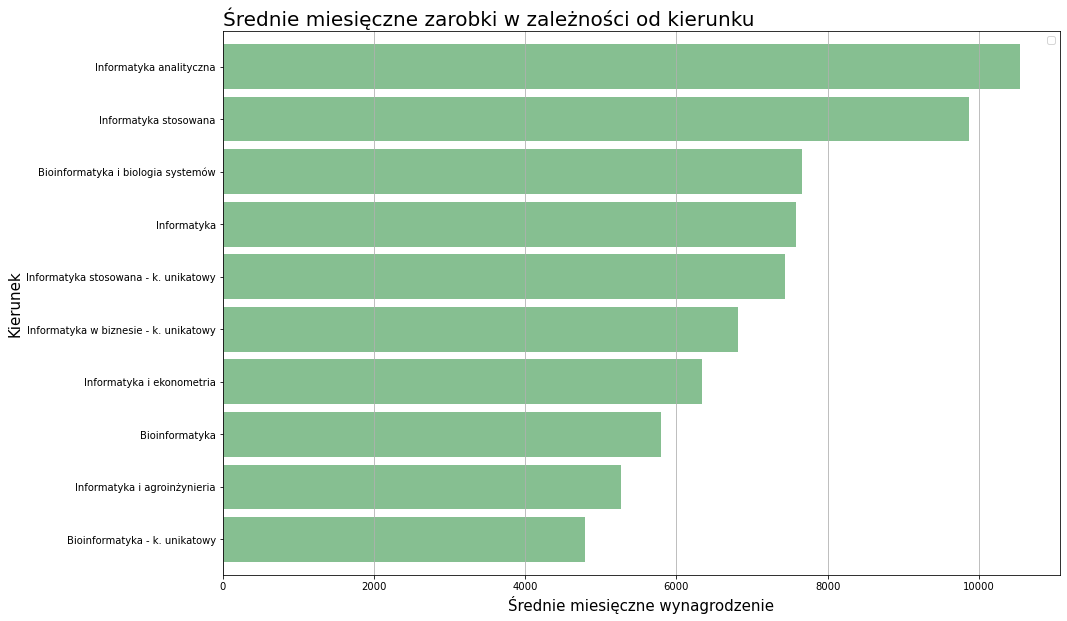

In [428]:
informatyka_pierwszy_stopien[["Kierunek","Średnie miesięczne wynagrodzenie"]].sort_values(by = "Średnie miesięczne wynagrodzenie",ascending = True).plot(kind='barh',x="Kierunek", y="Średnie miesięczne wynagrodzenie", figsize = (15,10), color='#86bf91', width=0.85)
plt.xlabel("Średnie miesięczne wynagrodzenie",fontsize = 15)
plt.ylabel("Kierunek",fontsize = 15)
plt.grid(axis="x")
plt.yticks(wrap = True,fontsize = 10)
plt.title("Średnie miesięczne zarobki w zależności od kierunku",fontsize = 20, loc = 'left')
plt.legend('')
plt.savefig('I_stopien_zarobki.png')
plt.show()

### Wyodrębnienie kierunków na których co najmniej 25 osób zdobyło tytuł zawodowy magistra

In [429]:
lista_kierunkow_2 = data_informatyka_drugi_stopien["P_KIERUNEK_NAZWA"].unique().tolist()
print(len(lista_kierunkow_2))
kierunek_liczba_studentow_2 = data_informatyka_drugi_stopien.groupby(by = ["P_KIERUNEK_NAZWA"])["P_N"].sum()
print(kierunek_liczba_studentow_2)

kierunek_2_25 = []
liczba_absolwentow_2_25 = []
for i in range(len(kierunek_liczba_studentow_2.values)):
    if kierunek_liczba_studentow_2.values[i] >= 25:
        kierunek_2_25.append(kierunek_liczba_studentow_2.index[i])
        liczba_absolwentow_2_25.append(kierunek_liczba_studentow_2.values[i])
print(len(kierunek_2_25))
print(kierunek_2_25)


7
P_KIERUNEK_NAZWA
Bioinformatyka i biologia systemów         42
Informatyka                               807
Informatyka i agroinżynieria               12
Informatyka i ekonometria                1000
Informatyka stosowana                      64
Informatyka stosowana - k. unikatowy       13
Informatyka w biznesie - k. unikatowy     102
Name: P_N, dtype: int64
5
['Bioinformatyka i biologia systemów', 'Informatyka', 'Informatyka i ekonometria', 'Informatyka stosowana', 'Informatyka w biznesie - k. unikatowy']


### Pogrupowanie absolwentów po kierunkach, stworzneie nowych kolumn

In [430]:
data_informatyka_drugi_stopien = data_informatyka_drugi_stopien[data_informatyka_drugi_stopien["P_KIERUNEK_NAZWA"].isin(kierunek_2_25)]
data_informatyka_drugi_stopien["Suma zarobków"] = data_informatyka_drugi_stopien.apply(lambda row: suma_zarobkow(row), axis=1)
data_informatyka_drugi_stopien = data_informatyka_drugi_stopien.groupby(by = "P_KIERUNEK_NAZWA")["Suma zarobków"].sum().to_frame()
data_informatyka_drugi_stopien["Liczba absolwentów"] = liczba_absolwentow_2_25
data_informatyka_drugi_stopien["Średnie miesięczne wynagrodzenie"] = data_informatyka_drugi_stopien.apply(lambda row: srednie_zarobki(row), axis=1)
data_informatyka_drugi_stopien["Kierunek"] = kierunek_2_25
data_informatyka_drugi_stopien

<ipython-input-430-911f3e49d889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_informatyka_drugi_stopien["Suma zarobków"] = data_informatyka_drugi_stopien.apply(lambda row: suma_zarobkow(row), axis=1)


,Suma zarobków,Liczba absolwentów,Średnie miesięczne wynagrodzenie,Kierunek
P_KIERUNEK_NAZWA,,,,
Bioinformatyka i biologia systemów,295039.80,42,7024.757143,Bioinformatyka i biologia systemów
Informatyka,7663218.98,807,9495.934300,Informatyka
Informatyka i ekonometria,8006617.68,1000,8006.617680,Informatyka i ekonometria
Informatyka stosowana,865559.74,64,13524.370937,Informatyka stosowana
Informatyka w biznesie - k. unikatowy,828360.43,102,8121.180686,Informatyka w biznesie - k. unikatowy


### Stworzenie bardziej przejrzystej tabeli

In [431]:
informatyka_drugi_stopien = data_informatyka_drugi_stopien[["Kierunek", "Średnie miesięczne wynagrodzenie","Liczba absolwentów"]].to_numpy()
informatyka_drugi_stopien = pd.DataFrame(informatyka_drugi_stopien, columns=["Kierunek", "Średnie miesięczne wynagrodzenie","Liczba absolwentów"])
informatyka_drugi_stopien = informatyka_drugi_stopien.sort_values(by ="Średnie miesięczne wynagrodzenie", ascending=False)
informatyka_drugi_stopien.reset_index(inplace=True, drop = True)
informatyka_drugi_stopien

,Kierunek,Średnie miesięczne wynagrodzenie,Liczba absolwentów
0,Informatyka stosowana,13524.370937,64
1,Informatyka,9495.9343,807
2,Informatyka w biznesie - k. unikatowy,8121.180686,102
3,Informatyka i ekonometria,8006.61768,1000
4,Bioinformatyka i biologia systemów,7024.757143,42


### Stworzenie wykresu typu barh w celu wizualizacji wynagrodzenia

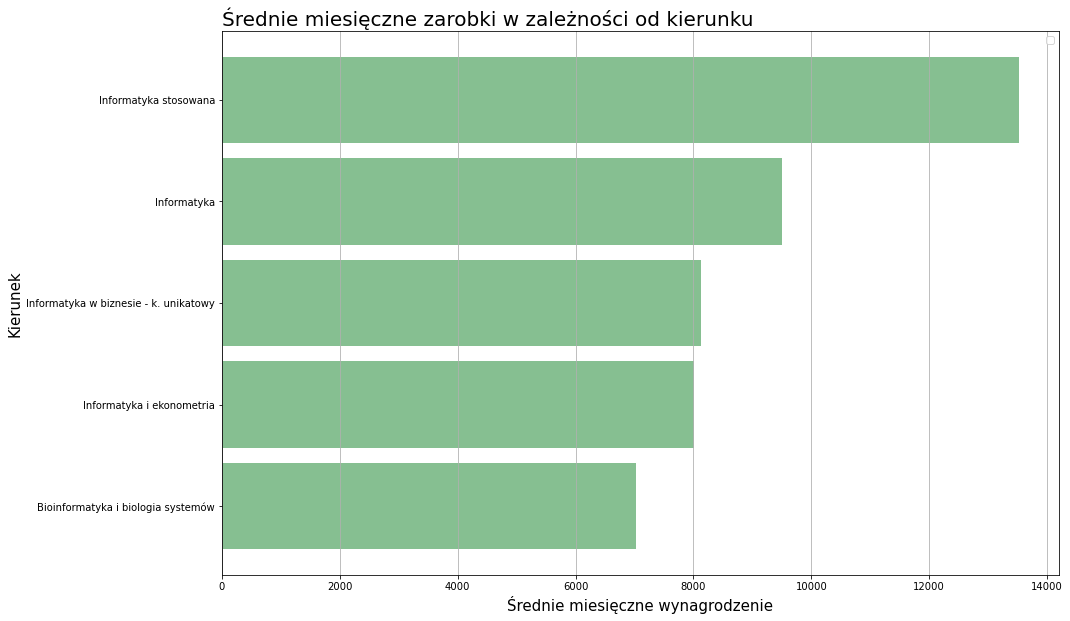

In [432]:
informatyka_drugi_stopien[["Kierunek","Średnie miesięczne wynagrodzenie"]].sort_values(by = "Średnie miesięczne wynagrodzenie",ascending = True).plot(kind='barh',x="Kierunek", y="Średnie miesięczne wynagrodzenie", figsize = (15,10), color='#86bf91', width=0.85)
plt.xlabel("Średnie miesięczne wynagrodzenie",fontsize = 15)
plt.ylabel("Kierunek",fontsize = 15)
plt.grid(axis="x")
plt.yticks(wrap = True,fontsize = 10)
plt.title("Średnie miesięczne zarobki w zależności od kierunku",fontsize = 20, loc = 'left')
plt.legend('')
plt.savefig('II_stopien_zarobki.png')
plt.show()

### Zdefinioanie funkci, która oblicza różnice między dwoma innymi kolumnami

In [433]:
def roznica_zarobkow(row):
    return row["Średnie miesięczne wynagrodzenie absolwentów II stopnia po 5 latach"] - row["Średnie miesięczne wynagrodzenie absolwentów I stopnia po 5 latach"] 

### Przekształcenie nazw kolumn, stworzenie nowej tabeli, obliczenie zwrotu z inwestycji, posortowanie tabeli

In [434]:
informatyka_pierwszy_stopien.rename(columns = {'Średnie miesięczne wynagrodzenie':'Średnie miesięczne wynagrodzenie absolwentów I stopnia po 5 latach', 'Liczba absolwentów':'Liczba absolwentów (I stopień)'}, inplace = True)
informatyka_drugi_stopien.rename(columns = {'Średnie miesięczne wynagrodzenie':'Średnie miesięczne wynagrodzenie absolwentów II stopnia po 5 latach', 'Liczba absolwentów':'Liczba absolwentów (II stopień)'}, inplace = True)
zysk_z_inwestycji = informatyka_pierwszy_stopien.copy().join(informatyka_drugi_stopien.set_index('Kierunek'), on = "Kierunek")
zysk_z_inwestycji["Zwrot z inwestycji"] = zysk_z_inwestycji.apply(lambda row: roznica_zarobkow(row), axis=1)
zysk_z_inwestycji = zysk_z_inwestycji.sort_values(by ="Zwrot z inwestycji", ascending=False)
zysk_z_inwestycji.reset_index(inplace=True, drop = True)
zysk_z_inwestycji


,Kierunek,Średnie miesięczne wynagrodzenie absolwentów I stopnia po 5 latach,Liczba absolwentów (I stopień),Średnie miesięczne wynagrodzenie absolwentów II stopnia po 5 latach,Liczba absolwentów (II stopień),Zwrot z inwestycji
0,Informatyka stosowana,9871.646508,126,13524.370937,64,3652.724430
1,Informatyka,7586.038336,1845,9495.9343,807,1909.895964
2,Informatyka i ekonometria,6336.791677,1109,8006.61768,1000,1669.826003
3,Informatyka w biznesie - k. unikatowy,6820.42697,132,8121.180686,102,1300.753717
4,Bioinformatyka i biologia systemów,7659.6625,36,7024.757143,42,-634.905357
5,Informatyka analityczna,10543.63,25,NaN,NaN,NaN
6,Informatyka stosowana - k. unikatowy,7442.022444,266,NaN,NaN,NaN
7,Bioinformatyka,5791.33,36,NaN,NaN,NaN
8,Informatyka i agroinżynieria,5265.425625,64,NaN,NaN,NaN
9,Bioinformatyka - k. unikatowy,4792.029074,54,NaN,NaN,NaN


### Stworzenie wykresu do wizualizacji zwrotu z inwestycji

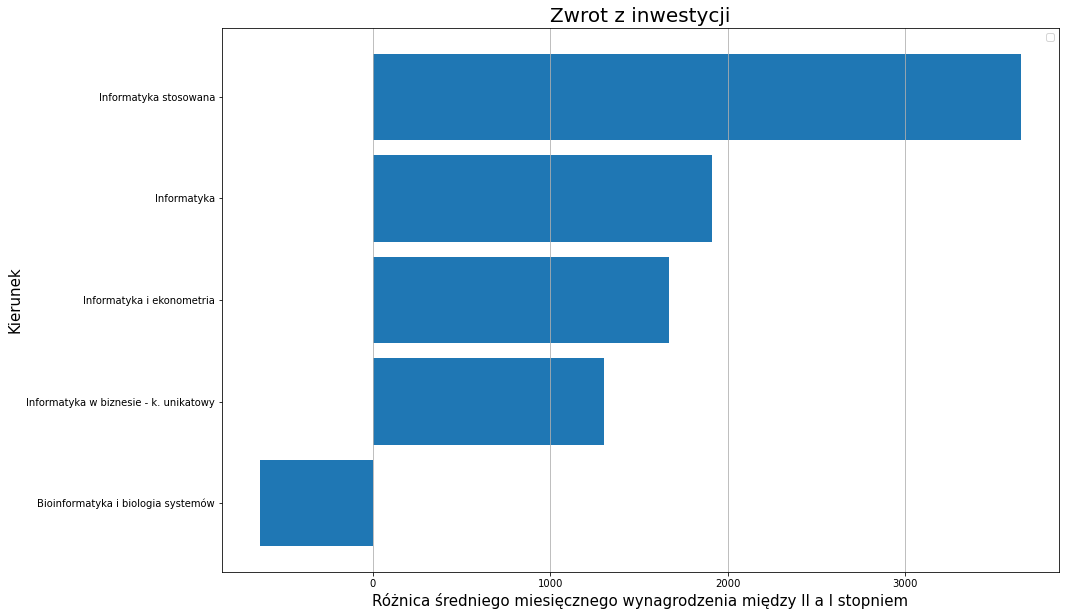

In [435]:
zysk_z_inwestycji = zysk_z_inwestycji[zysk_z_inwestycji["Zwrot z inwestycji"].notna()]
zysk_z_inwestycji[["Kierunek","Zwrot z inwestycji"]].sort_values(by = "Zwrot z inwestycji",ascending = True).plot(kind='barh',x="Kierunek", y="Zwrot z inwestycji", figsize = (15,10), color='tab:blue', width=0.85)
plt.xlabel("Różnica średniego miesięcznego wynagrodzenia między II a I stopniem",fontsize = 15)
plt.ylabel("Kierunek",fontsize = 15)
plt.grid(axis="x")
plt.yticks(wrap = True,fontsize = 10)
plt.title("Zwrot z inwestycji",fontsize = 20)
plt.legend('')
plt.savefig('zwrot_z_inwestycji.png')
plt.show()